In [4]:
import duckdb
import matplotlib.pyplot as plt
import json
from create_database import (
    add_initial_tables,
    add_comments_to_comments_tables,
    create_lookup_table,
    create_subreddit_tables,
    create_threads_table,
)
from stats import (
    create_row_counts_table,
    create_filtered_row_counts,
    analyze_thread_score_distribution,
    get_subreddit_distribution,
    table_stats,
    calculate_weighted_average,
    get_thread_lengths,
)
from filter_database import make_threads_unique, filter_threads

con = duckdb.connect("../data/database_sample.db")

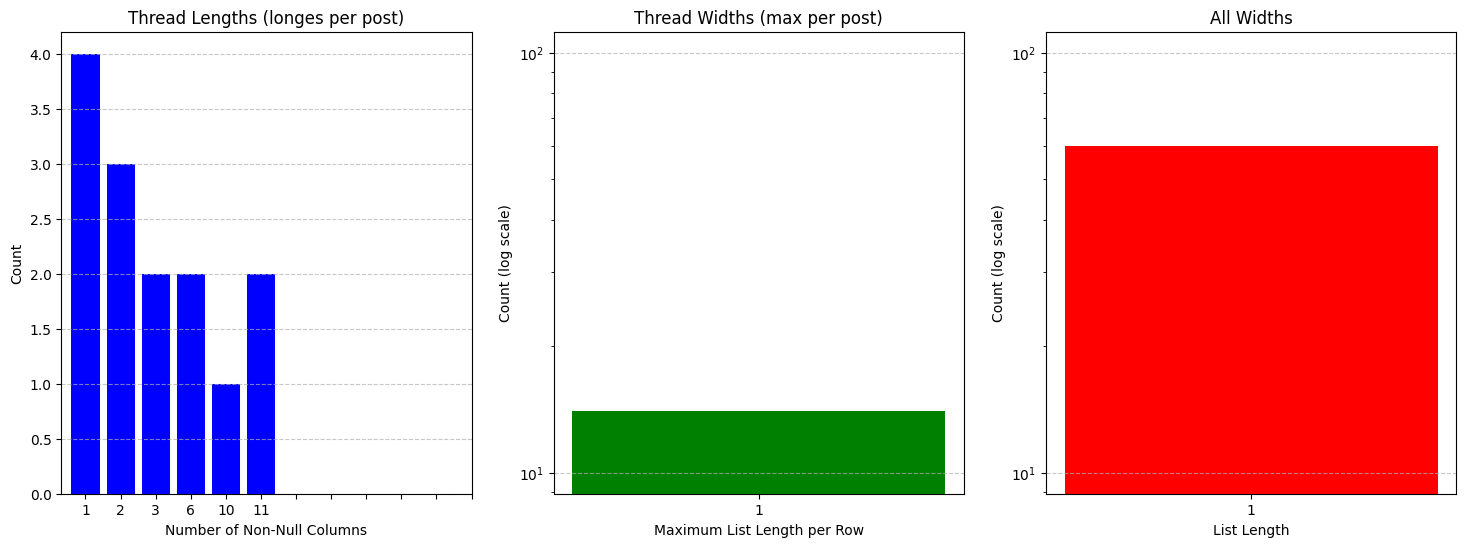

In [8]:
with open("../data/saved_stats.json", "r") as f:
    existing_data = json.load(f)
thread_lengths_dict = existing_data["thread_lengths_lookup_table"]
thread_widths_dict = existing_data["thread_widths_lookup_table"]
all_widths_dict = existing_data["all_widths_lookup_table"]

# Create bar plots
plt.figure(figsize=(18, 6))

# Plot 1: Thread Lengths
plt.subplot(1, 3, 1)
# Ensure the bars are ordered by x
sorted_keys = sorted(thread_lengths_dict.keys(), key=int)
sorted_values = [thread_lengths_dict[key] for key in sorted_keys]
plt.bar(sorted_keys, sorted_values, color="blue")
plt.title("Thread Lengths (longes per post)")
plt.xlabel("Number of Non-Null Columns")
plt.ylabel("Count")
plt.xticks(range(12))  # Set x ticks to be all integers from 0 to 11
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot 2: Thread Widths
plt.subplot(1, 3, 2)
plt.bar(thread_widths_dict.keys(), thread_widths_dict.values(), color="green")
plt.title("Thread Widths (max per post)")
plt.xlabel("Maximum List Length per Row")
plt.ylabel("Count (log scale)")
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot 3: All Widths
plt.subplot(1, 3, 3)
plt.bar(all_widths_dict.keys(), all_widths_dict.values(), color="red")
plt.title("All Widths")
plt.xlabel("List Length")
plt.ylabel("Count (log scale)")
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [ ]:
subreddit_threads = [
    "AskReddit_threads",
    "memes_threads",
    "u_toronto_news_threads",
    "dirtykikpals_threads",
    "teenagers_threads",
]
for thread in subreddit_threads:
    thread_lengths, thread_widths, all_widths = table_stats(thread)

    # Display the results
    print(f"\nResults for {thread}:")
    """print("Thread Lengths:", dict(thread_lengths))
    print("Thread Widths:", dict(thread_widths))
    print("All Widths:", dict(all_widths))"""

    thread_lengths_dict = dict(thread_lengths)
    thread_widths_dict = {k: v for k, v in thread_widths.items() if k <= 2000}
    all_widths_dict = {k: v for k, v in all_widths.items() if k <= 2000}

    # Create bar plots
    plt.figure(figsize=(18, 6))
    # Title for the entire plot
    plt.suptitle(f"Results for {thread}", fontsize=16)

    # Plot 1: Thread Lengths
    plt.subplot(1, 3, 1)
    plt.bar(thread_lengths_dict.keys(), thread_lengths_dict.values(), color="blue")
    plt.title("Thread Lengths (longes per post)")
    plt.xlabel("Number of Non-Null Columns")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Plot 2: Thread Widths
    plt.subplot(1, 3, 2)
    plt.bar(thread_widths_dict.keys(), thread_widths_dict.values(), color="green")
    plt.title("Thread Widths (max per post)")
    plt.xlabel("Maximum List Length per Row")
    plt.ylabel("Count (log scale)")
    plt.yscale("log")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Plot 3: All Widths
    plt.subplot(1, 3, 3)
    plt.bar(all_widths_dict.keys(), all_widths_dict.values(), color="red")
    plt.title("All Widths")
    plt.xlabel("List Length")
    plt.ylabel("Count (log scale)")
    plt.yscale("log")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    thread_lengths_avg = calculate_weighted_average(thread_lengths_dict)
    thread_widths_avg = calculate_weighted_average(thread_widths_dict)
    all_widths_avg = calculate_weighted_average(all_widths_dict)

    print("Weighted Average Thread Length:", thread_lengths_avg)
    print("Weighted Average Thread Width:", thread_widths_avg)
    print("Weighted Average All Widths:", all_widths_avg)

In [3]:
con = duckdb.connect("database.db")

# Fetch the row counts into a Pandas DataFrame
df = con.execute("SELECT * FROM filtered_row_counts").fetchdf()
# Close the connection
con.close()
# df = df.sort_values(by="row_count", ascending=False)
# Pretty-print the DataFrame
print(df.to_string(index=False))

thread_lengths = {}
for i in range(len(df) - 1):
    current_col = df.loc[i, "conversation_length"]
    previous_col = df.loc[i + 1, "conversation_length"]
    current_count = df.loc[i, "row_count"]
    previous_count = df.loc[i + 1, "row_count"]
    thread_lengths[i] = current_count - previous_count

# Print the result
print(thread_lengths)

# Create bar plots
plt.figure(figsize=(18, 6))

# Plot 1: Thread Lengths
plt.subplot(1, 3, 1)
plt.bar(thread_lengths.keys(), thread_lengths.values(), color="blue")
plt.title("Filtered Thread Lengths")
plt.xlabel("Number of Non-Null Columns")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

CatalogException: Catalog Error: Table with name filtered_row_counts does not exist!
Did you mean "pg_description"?
LINE 1: SELECT * FROM filtered_row_counts
                      ^

In [ ]:
subreddit_threads = [
    "filtered_AskReddit_threads",
    "filtered_memes_threads",
    "filtered_u_toronto_news_threads",
    "filtered_dirtykikpals_threads",
    "filtered_teenagers_threads",
]

# Create one wide figure to hold all plots
plt.figure(figsize=(25, 5))

# Loop through threads and create subplots horizontally
for idx, thread in enumerate(subreddit_threads, 1):
    thread_lengths, thread_widths, all_widths = table_stats(thread)

    # Display the results
    print(f"\nResults for {thread}:")

    thread_lengths_dict = dict(thread_lengths)

    # Create subplot in horizontal arrangement
    plt.subplot(1, 5, idx)
    plt.bar(thread_lengths_dict.keys(), thread_lengths_dict.values(), color="blue")
    plt.title(thread.replace("filtered_", "").replace("_threads", ""), fontsize=10)
    plt.xlabel("Number of Non-Null Columns")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    thread_lengths_avg = calculate_weighted_average(thread_lengths_dict)
    print("Weighted Average Thread Length:", thread_lengths_avg)

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
# Run the analysis and print the results
distribution = analyze_thread_score_distribution("threads")

# Sort by score value for better readability
sorted_distribution = dict(sorted(distribution.items()))
sorted_distribution = {k: v for k, v in sorted_distribution.items() if k <= 200}

# Print some statistics
total_threads = sum(distribution.values())
print("\nTotal number of threads analyzed:", total_threads)
# Print weighted average
weighted_average = calculate_weighted_average(sorted_distribution)
print("Weighted Average Score:", weighted_average)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_distribution.keys(), sorted_distribution.values(), color="blue")
plt.title("Scores per thread distribution")
plt.xlabel("Summed Score over Thread")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [ ]:
# Run the analysis and print the results
distribution = analyze_thread_score_distribution("filtered_threads")

# Sort by score value for better readability
sorted_distribution = dict(sorted(distribution.items()))
sorted_distribution = {k: v for k, v in sorted_distribution.items() if k <= 200}

# Print some statistics
total_threads = sum(distribution.values())
print("\nTotal number of threads analyzed:", total_threads)
# Print weighted average
weighted_average = calculate_weighted_average(sorted_distribution)
print("Weighted Average Score:", weighted_average)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_distribution.keys(), sorted_distribution.values(), color="blue")
plt.title("Scores per thread distribution")
plt.xlabel("Summed Score over Thread")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [9]:
con.close()